### Load the image dog.jpg and convert to grayscale. Use the FFT to compress the image at different compression ratios. Plot the error between the compressed and actual image as a function of the compression ratio.

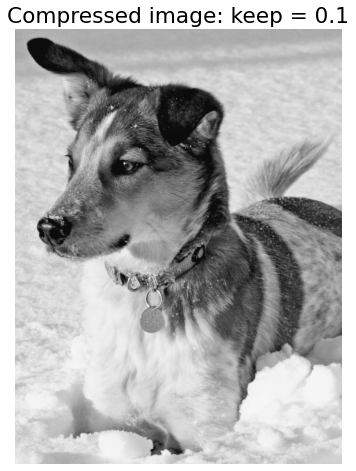

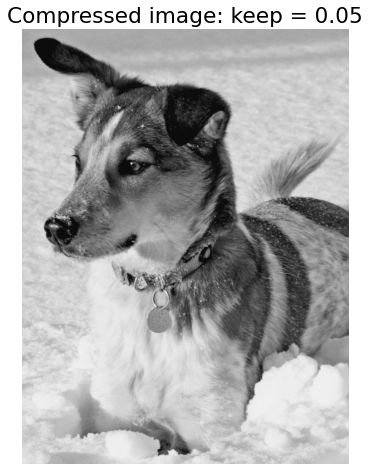

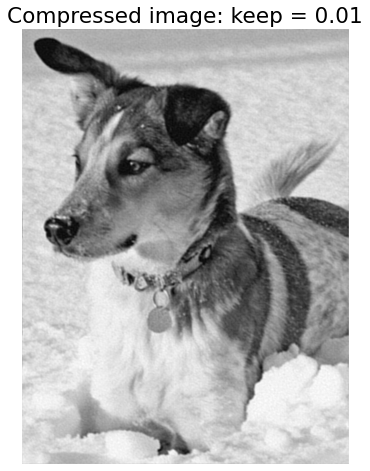

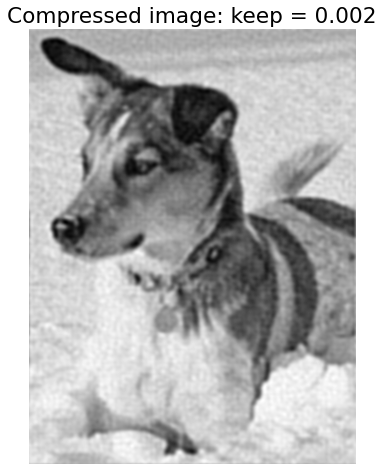

In [1]:
#Importing required Libraries
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B) # Using FFT 
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude to determine the Threshold for zeroing out some coedd
 
Error = [0]*4  # Creating an empty array for storing Error
k=0
# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))
    Error[k] = np.square(np.subtract(B,Alow)).mean() # Calculating Root Mean Square error between compressed and original
    k=k+1        

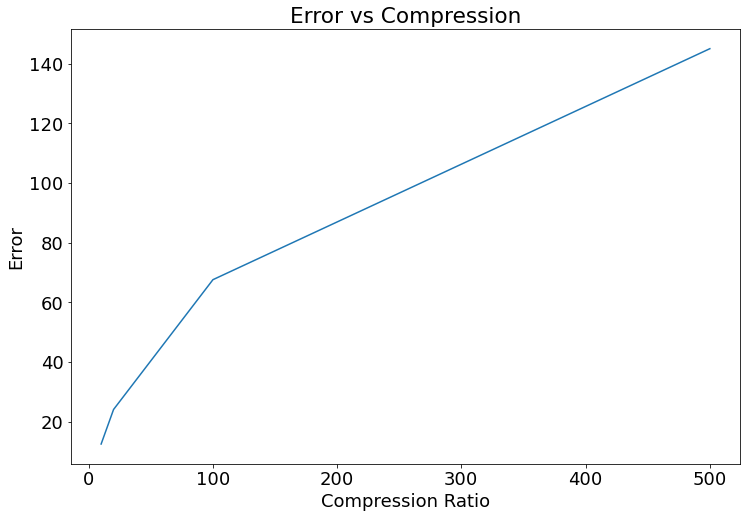

In [4]:
comp_ratio = [1/0.1, 1/0.05, 1/0.01, 1/0.002] #1/keep is the compression ratio
plt.plot(comp_ratio, Error)

plt.xlabel("Compression Ratio")
plt.ylabel("Error")
plt.title("Error vs Compression")
plt.show()